In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [5]:
print(df)

               hour_beginning         location  Pedestrians  \
0      04/30/2019 12:00:00 AM  Brooklyn Bridge            3   
1      12/31/2019 10:00:00 PM  Brooklyn Bridge           10   
2      12/31/2019 11:00:00 PM  Brooklyn Bridge            2   
3      12/31/2019 09:00:00 PM  Brooklyn Bridge           12   
4      04/01/2019 03:00:00 AM  Brooklyn Bridge            1   
...                       ...              ...          ...   
16052  06/22/2018 04:00:00 AM  Brooklyn Bridge            7   
16053  07/19/2018 06:00:00 AM  Brooklyn Bridge          192   
16054  06/16/2018 04:00:00 PM  Brooklyn Bridge         2623   
16055  07/24/2018 06:00:00 PM  Brooklyn Bridge         2016   
16056  07/23/2018 12:00:00 AM  Brooklyn Bridge           57   

       Towards Manhattan  Towards Brooklyn      weather_summary  temperature  \
0                      3                 0                  NaN          NaN   
1                      9                 1               cloudy         42.0   
2  

In [7]:
# question 1

df['day_name'] = df['hour_beginning'].dt.day_name()

print(df['day_name'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB
0         Tuesday
1         Tuesday
2   

In [8]:
print(df)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
0     2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
1     2019-12-31 22:00:00  Brooklyn Bridge           10                  9   
2     2019-12-31 23:00:00  Brooklyn Bridge            2                  0   
3     2019-12-31 21:00:00  Brooklyn Bridge           12                  0   
4     2019-04-01 03:00:00  Brooklyn Bridge            1                  0   
...                   ...              ...          ...                ...   
16052 2018-06-22 04:00:00  Brooklyn Bridge            7                  4   
16053 2018-07-19 06:00:00  Brooklyn Bridge          192                 89   
16054 2018-06-16 16:00:00  Brooklyn Bridge         2623               1161   
16055 2018-07-24 18:00:00  Brooklyn Bridge         2016               1069   
16056 2018-07-23 00:00:00  Brooklyn Bridge           57                 20   

       Towards Brooklyn      weather_summary  temperature  prec

In [11]:
onlyWeekdays = df.query('day_name != "Saturday"').query('day_name != "Sunday"')
print(onlyWeekdays)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
0     2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
1     2019-12-31 22:00:00  Brooklyn Bridge           10                  9   
2     2019-12-31 23:00:00  Brooklyn Bridge            2                  0   
3     2019-12-31 21:00:00  Brooklyn Bridge           12                  0   
4     2019-04-01 03:00:00  Brooklyn Bridge            1                  0   
...                   ...              ...          ...                ...   
16051 2018-07-12 00:00:00  Brooklyn Bridge           77                 39   
16052 2018-06-22 04:00:00  Brooklyn Bridge            7                  4   
16053 2018-07-19 06:00:00  Brooklyn Bridge          192                 89   
16055 2018-07-24 18:00:00  Brooklyn Bridge         2016               1069   
16056 2018-07-23 00:00:00  Brooklyn Bridge           57                 20   

       Towards Brooklyn      weather_summary  temperature  prec

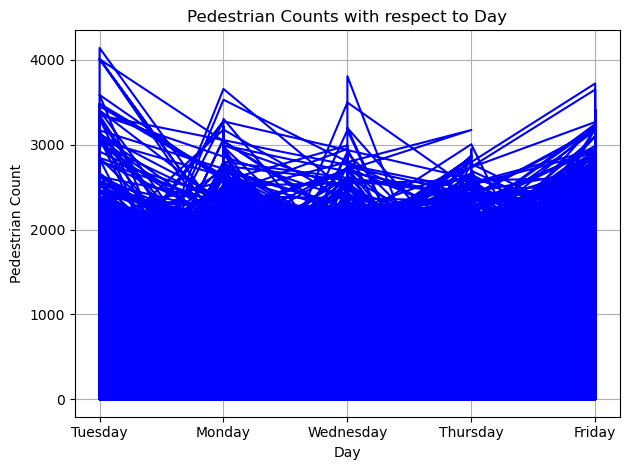

In [12]:
plt.plot(onlyWeekdays['day_name'], onlyWeekdays['Pedestrians'], color='blue')
plt.title('Pedestrian Counts with respect to Day')
plt.xlabel('Day')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# question 2


In [22]:
df = df.sort_values('weather_summary')
print(df)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
11750 2017-10-28 11:00:00  Brooklyn Bridge         4330               2150   
11354 2017-10-03 10:00:00  Brooklyn Bridge          936                555   
12870 2018-04-20 19:00:00  Brooklyn Bridge          935                437   
1317  2019-04-25 09:00:00  Brooklyn Bridge          932                486   
3021  2019-12-19 13:00:00  Brooklyn Bridge          926                392   
...                   ...              ...          ...                ...   
5962  2019-05-08 00:00:00  Brooklyn Bridge            3                  2   
0     2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
482   2019-01-06 00:00:00  Brooklyn Bridge            3                  3   
3951  2019-01-16 00:00:00  Brooklyn Bridge            7                  2   
12796 2018-05-13 00:00:00  Brooklyn Bridge           98                 69   

       Towards Brooklyn weather_summary  temperature  precipita

In [46]:
one_hot = pd.get_dummies(df['weather_summary'])
# Drop column B as it is now encoded
df = df.drop('weather_summary',axis = 1)
# Join the encoded df
df = df.join(one_hot)


KeyError: 'weather_summary'

In [25]:
print(df)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
11750 2017-10-28 11:00:00  Brooklyn Bridge         4330               2150   
11354 2017-10-03 10:00:00  Brooklyn Bridge          936                555   
12870 2018-04-20 19:00:00  Brooklyn Bridge          935                437   
1317  2019-04-25 09:00:00  Brooklyn Bridge          932                486   
3021  2019-12-19 13:00:00  Brooklyn Bridge          926                392   
...                   ...              ...          ...                ...   
5962  2019-05-08 00:00:00  Brooklyn Bridge            3                  2   
0     2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
482   2019-01-06 00:00:00  Brooklyn Bridge            3                  3   
3951  2019-01-16 00:00:00  Brooklyn Bridge            7                  2   
12796 2018-05-13 00:00:00  Brooklyn Bridge           98                 69   

       Towards Brooklyn  temperature  precipitation        lat 

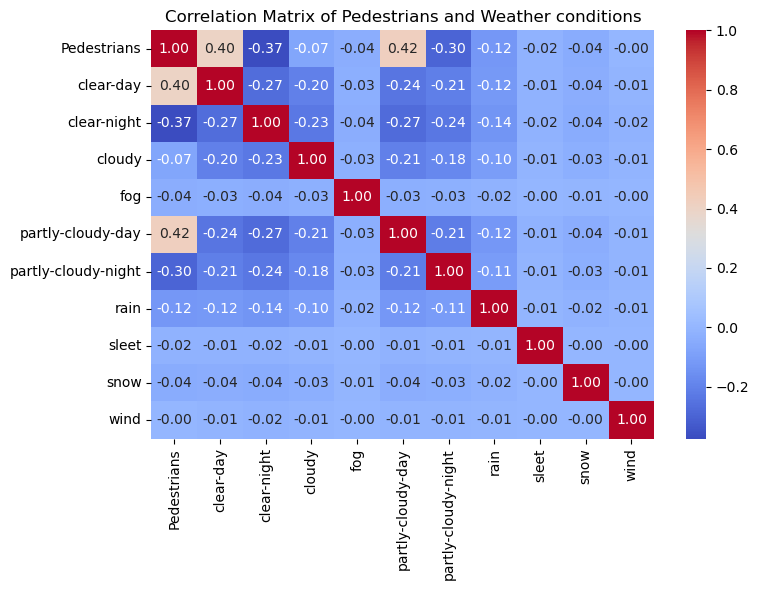

In [28]:
correlation_matrix = df[['Pedestrians', 'clear-day', 'clear-night','cloudy','fog','partly-cloudy-day','partly-cloudy-night','rain','sleet','snow','wind']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Weather conditions')
plt.tight_layout()
plt.show()


In [63]:
def getTime(row):
    
    if (row['hour'] > 6 and row['hour'] < 12):
        return 0
    elif (row['hour'] > 12 and row['hour'] < 18):
        return 0
    elif (row['hour'] > 18 and row['hour'] < 21):
        return 1
    else:
        return 0
    

In [64]:
df['hour'] = df['hour_beginning'].dt.hour
df['evening'] = df.apply(getTime, axis=1)

In [65]:
print(df)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
11750 2017-10-28 11:00:00  Brooklyn Bridge         4330               2150   
11354 2017-10-03 10:00:00  Brooklyn Bridge          936                555   
12870 2018-04-20 19:00:00  Brooklyn Bridge          935                437   
1317  2019-04-25 09:00:00  Brooklyn Bridge          932                486   
3021  2019-12-19 13:00:00  Brooklyn Bridge          926                392   
...                   ...              ...          ...                ...   
5962  2019-05-08 00:00:00  Brooklyn Bridge            3                  2   
0     2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
482   2019-01-06 00:00:00  Brooklyn Bridge            3                  3   
3951  2019-01-16 00:00:00  Brooklyn Bridge            7                  2   
12796 2018-05-13 00:00:00  Brooklyn Bridge           98                 69   

       Towards Brooklyn  temperature  precipitation        lat 

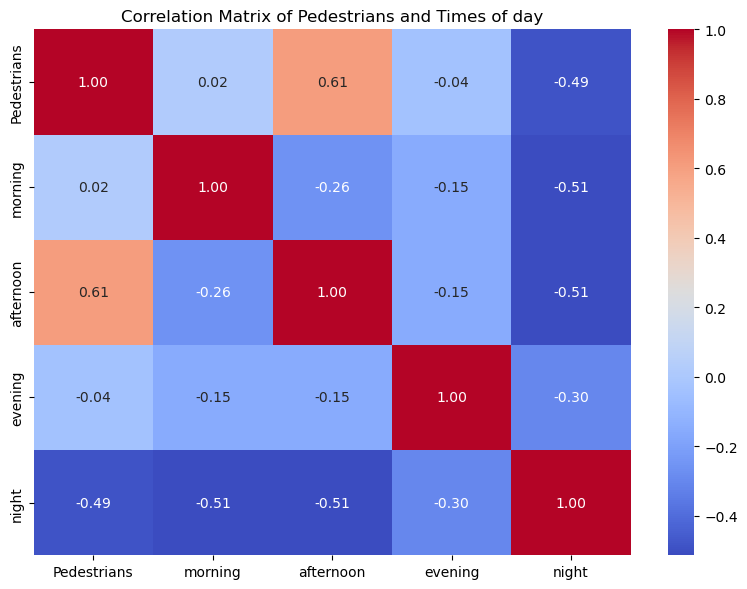

In [66]:
correlation_matrix = df[['Pedestrians', 'morning', 'afternoon','evening','night']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Times of day')
plt.tight_layout()
plt.show()